In [1]:
from __future__ import division
import re
import math

In [62]:
# Specify the input file. This should be text output from chain.cpp
input_file = open(r"C:/Users/avagnoz/Desktop/AM_Markov_Results/markov_results_220110/output_congressDRAFT3H.txt","r")

In [63]:
MC_input = []

for line in input_file.readlines():
    MC_input.append(line)

In [64]:
input_file.close()

In [65]:
MC_input

['We have 2260 precincts.\n',
 'There are 972/2 boundary edges\n',
 'first p is 0.107498\n',
 'first revisitations is 1\n',
 'A has 1108559 votes\n',
 'B has 1364749 votes\n',
 'total population is 5118425\n',
 'initial variance is 0.00961223\n',
 'initial median_mean is 0.0282461\n',
 'initial BG_modified is 0.0244749\n',
 'initial efficiency_gap is 0.262385\n',
 'Thread 0 reporting\n',
 '--FOR VARIANCE--\n',
 'current variance is 0.0029873\n',
 'thread moreunusual is 54\n',
 'thread lessunusual is 4194250\n',
 'total moreunusual/steps is 54/4194304\n',
 'ep=1.2875e-05\n',
 'p=0.0050744\n',
 '\n',
 '--FOR MEDIAN/MEAN--\n',
 'current median_mean is -0.013124\n',
 'thread moreunusual is 5942\n',
 'thread lessunusual is 4188362\n',
 'total moreunusual/steps is 5942/4194304\n',
 'ep=0.0014167\n',
 'p=0.053229\n',
 '\n',
 '--FOR B_G MODIFIED--\n',
 'current BG_modified is 0.028143\n',
 'thread moreunusual is 3587510\n',
 'thread lessunusual is 606794\n',
 'total moreunusual/steps is 358751

In [66]:
#for line in MC_input:
#    print line

In [67]:
# Value, More Unusual, Less Unusual, Steps Taken, Epsilon, p-value

# Create step/iteration counters.
k_mm = 0
k_v = 0
k_eg = 0
k_pb = 0
k_bgu = 0
k_bgm = 0

# Create boolean flags for which tests are being used.
test_median_mean = False
test_variance = False
test_efficiency_gap = False
test_partisan_bias = False
test_BG_uniform = False
test_BG_modified = False

# Create a variable that specifies which bias measure at which we are currently looking.
Current_Test = None
# Possible Values: 'Median_Mean', 'Variance', 'Efficiency_Gap', 'Partisan_Bias', 'BG_Uniform', 'BG_Modified'

for line in MC_input:
    # BASE CASE: INITIAL OUTPUT
    # Nesting things within the INITIAL check is more efficient.
    if re.match(r'initial',line):
        # Determine which initial output is given.
        
        if re.match(r'initial median_mean',line):
            # Note that we are using this bias measure.
            test_median_mean = True
            # Create the data frame I need.
            MC_Median_Mean = list()
            # Find the index where the value is in the line.
            idx = re.match(r'initial median_mean is ',line).end()
            # Make sure we're looking at the value and not the space before it.
            assert(line[idx]!=' ') # Kind of unneccessary but I'm paranoid.
            # Store the current value.
            current_value = -float(line[idx:-1])
            # Initialize not applicable values.
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            # Append the first line to the correct data frame.
            MC_Median_Mean.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
            
        elif re.match(r'initial variance',line):
            test_variance = True
            MC_Variance = list()
            idx = re.match(r'initial variance is ',line).end()
            assert(line[idx]!=' ')
            current_value = float(line[idx:-1])
            assert(len(MC_Variance)==0)
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            MC_Variance.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
            
        elif re.match(r'initial efficiency_gap',line):
            test_efficiency_gap = True
            MC_Efficiency_Gap = list()
            idx = re.match(r'initial efficiency_gap is ',line).end()
            assert(line[idx]!=' ')
            current_value = float(line[idx:-1])
            assert(len(MC_Efficiency_Gap)==0)
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            MC_Efficiency_Gap.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
            
        elif re.match(r'initial partisan_bias',line):
            test_partisan_bias = True
            MC_Partisan_Bias = list()
            idx = re.match(r'initial partisan_bias is ',line).end()
            assert(line[idx]!=' ')
            current_value = float(line[idx:-1])
            assert(len(MC_Partisan_Bias)==0)
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            MC_Partisan_Bias.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
        
        elif re.match(r'initial BG_uniform',line):
            test_BG_uniform = True
            MC_BG_Uniform = list()
            idx = re.match(r'initial BG_uniform is ',line).end()
            assert(line[idx]!=' ')
            current_value = float(line[idx:-1])
            assert(len(MC_BG_Uniform)==0)
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            MC_BG_Uniform.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
        
        elif re.match(r'initial BG_modified',line):
            test_BG_modified = True
            MC_BG_Modified = list()
            idx = re.match(r'initial BG_modified is ',line).end()
            assert(line[idx]!=' ')
            current_value = float(line[idx:-1])
            assert(len(MC_BG_Modified)==0)
            thread_moreunusual=None
            thread_lessunusual=None
            steps=0
            ep=None
            p=None
            MC_BG_Modified.append([current_value,thread_moreunusual,thread_lessunusual,steps,ep,p])
            
        else:
            raise Exception('Error: Unknown partisan bias measure used!')

    #####################################################################################################
            
    # IF WE HIT THE START OF AN ANALYSIS BLOCK
    # Analysis blocks include all specified measures for that step of the chain.
    elif re.match(r'Thread 0 reporting',line):
        # For the appropriate tests...
        if test_median_mean == True:
            # If we've only recorded the initial data, do nothing.
            if k_mm == 0:
                pass
            # If we've looked at a new analysis block, then add it to the appropriate data frame.
            elif k_mm > 0:
                MC_Median_Mean.append([current_mm,moreunusual_mm,lessunusual_mm,steps_mm,ep_mm,p_mm])
        if test_variance == True:
            if k_v == 0:
                pass
            elif k_v >0:
                MC_Variance.append([current_v,moreunusual_v,lessunusual_v,steps_v,ep_v,p_v])
        if test_efficiency_gap == True:
            if k_eg == 0:
                pass
            elif k_eg > 0:
                MC_Efficiency_Gap.append([current_eg,moreunusual_eg,lessunusual_eg,steps_eg,ep_eg,p_eg])
        if test_partisan_bias == True: 
            if k_pb == 0:
                pass
            elif k_pb > 0:
                MC_Partisan_Bias.append([current_pb,moreunusual_pb,lessunusual_pb,steps_pb,ep_pb,p_pb])
        if test_BG_uniform == True:
            # If we've only recorded the initial data, do nothing.
            if k_bgu == 0:
                pass
            # If we've looked at a new analysis block, then add it to the appropriate data frame.
            elif k_bgu > 0:
                MC_BG_Uniform.append([current_bgu,moreunusual_bgu,lessunusual_bgu,steps_bgu,ep_bgu,p_bgu])
        if test_BG_modified == True:
            # If we've only recorded the initial data, do nothing.
            if k_bgm == 0:
                pass
            # If we've looked at a new analysis block, then add it to the appropriate data frame.
            elif k_bgm > 0:
                MC_BG_Modified.append([current_bgm,moreunusual_bgm,lessunusual_bgm,steps_bgm,ep_bgm,p_bgm])
        # Note: It's okay that we're not appending the very last values of the chain (after the last
        # "Thread 0 Reporting" line) because they are repeats anyway.
    
    #####################################################################################################
    
    # IF WE HIT A BIAS MEASURE HEADER
    elif re.match(r'--FOR',line):
        if re.match(r'--FOR MEDIAN/MEAN--',line):
            Current_Test = 'Median_Mean'
        elif re.match(r'--FOR VARIANCE--',line):
            Current_Test = 'Variance'
        elif re.match(r'--FOR Efficiency Gap--',line):
            Current_Test = 'Efficiency_Gap'
        elif re.match(r'--FOR PARTISAN_BIAS--',line):
            Current_Test = 'Partisan_Bias'
        elif re.match(r'--FOR B_G UNIFORM--',line):
            Current_Test = 'BG_Uniform'
        elif re.match(r'--FOR B_G MODIFIED--',line):
            Current_Test = 'BG_Modified'
        else:
            raise Exception('Error: Unknown partisan bias measure used!')

    #####################################################################################################
            
    # CURRENT VALUE
    elif re.match(r'current',line):
        if re.match(r'current median_mean is ',line) and Current_Test == 'Median_Mean':
            idx = re.match(r'current median_mean is ',line).end()
            assert(line[idx]!=' ')
            current_mm = -float(line[idx:-1])
        elif re.match(r'current variance is ',line) and Current_Test == 'Variance':
            idx = re.match(r'current variance is ',line).end()
            assert(line[idx]!=' ')
            current_v = float(line[idx:-1])            
        elif re.match(r'current efficiency_gap is ',line) and Current_Test == 'Efficiency_Gap':
            idx = re.match(r'current efficiency_gap is ',line).end()
            assert(line[idx]!=' ')
            current_eg = float(line[idx:-1])  
        elif re.match(r'current partisan_bias is ', line) and Current_Test == 'Partisan_Bias':
            idx = re.match(r'current partisan_bias is ',line).end()
            assert(line[idx]!=' ')
            current_pb = float(line[idx:-1])  
        elif re.match(r'current BG_uniform is ', line) and Current_Test == 'BG_Uniform':
            idx = re.match(r'current BG_uniform is ',line).end()
            assert(line[idx]!=' ')
            current_bgu = float(line[idx:-1])  
        elif re.match(r'current BG_modified is ', line) and Current_Test == 'BG_Modified':
            idx = re.match(r'current BG_modified is ',line).end()
            assert(line[idx]!=' ')
            current_bgm = float(line[idx:-1])  
        else:
            raise Exception('Error: Unknown partisan bias measure used!')

    #####################################################################################################

    # THREAD MOREUNUSUAL
    elif re.match(r'thread moreunusual',line):
        idx = re.match(r'thread moreunusual is ',line).end()
        if Current_Test == 'Median_Mean':
            moreunusual_mm = int(line[idx:-1])
        elif Current_Test == 'Variance':
            moreunusual_v = int(line[idx:-1])
        elif Current_Test == 'Efficiency_Gap':
            moreunusual_eg = int(line[idx:-1])
        elif Current_Test == 'Partisan_Bias':
            moreunusual_pb = int(line[idx:-1])
        elif Current_Test == 'BG_Uniform':
            moreunusual_bgu = int(line[idx:-1])
        elif Current_Test == 'BG_Modified':
            moreunusual_bgm = int(line[idx:-1])
        else:
            raise Exception('Error: Unknown partisan bias measure used!')
    
    #####################################################################################################
    
    # THREAD LESSUNUSUAL
    elif re.match(r'thread lessunusual',line):
        idx = re.match(r'thread lessunusual is ',line).end()
        if Current_Test == 'Median_Mean':
            lessunusual_mm = int(line[idx:-1])
            steps_mm = moreunusual_mm + lessunusual_mm
        elif Current_Test == 'Variance':
            lessunusual_v = int(line[idx:-1])
            steps_v = moreunusual_v + lessunusual_v
        elif Current_Test == 'Efficiency_Gap':
            lessunusual_eg = int(line[idx:-1])
            steps_eg = moreunusual_eg + lessunusual_eg
        elif Current_Test == 'Partisan_Bias':
            lessunusual_pb = int(line[idx:-1])
            steps_pb = moreunusual_pb + lessunusual_pb
        elif Current_Test == 'BG_Uniform':
            lessunusual_bgu = int(line[idx:-1])
            steps_bgu = moreunusual_bgu + lessunusual_bgu
        elif Current_Test == 'BG_Modified':
            lessunusual_bgm = int(line[idx:-1])
            steps_bgm = moreunusual_bgm + lessunusual_bgm
        else:
            raise Exception('Error: Unknown partisan bias measure used!')
        
    #####################################################################################################
    
    # EPSILON
    elif re.match(r'ep=',line):
        idx = re.match(r'ep=',line).end()
        if Current_Test == 'Median_Mean':
            ep_mm = float(line[idx:-1])
        elif Current_Test == 'Variance':
            ep_v = float(line[idx:-1])
        elif Current_Test == 'Efficiency_Gap':
            ep_eg = float(line[idx:-1])
        elif Current_Test == 'Partisan_Bias':
            ep_pb = float(line[idx:-1])
        elif Current_Test == 'BG_Uniform':
            ep_bgu = float(line[idx:-1])
        elif Current_Test == 'BG_Modified':
            ep_bgm = float(line[idx:-1])
        else:
            raise Exception('Error: Unknown partisan bias measure used!')
        
    #####################################################################################################    
               
    # P-VALUE
    elif re.match(r'p=',line):
        idx = re.match(r'p=',line).end()
        if Current_Test == 'Median_Mean':
            p_mm = float(line[idx:-1])
            # When you've gotten to the p-value, you've reached the end of an analysis sub-block.
            # You can increase the counter now.
            k_mm = k_mm + 1
        elif Current_Test == 'Variance':
            p_v = float(line[idx:-1])
            k_v = k_v + 1
        elif Current_Test == 'Efficiency_Gap':
            p_eg = float(line[idx:-1])
            k_eg = k_eg + 1
        elif Current_Test == 'Partisan_Bias':
            p_pb = float(line[idx:-1])
            k_pb = k_pb + 1
        elif Current_Test == 'BG_Uniform':
            p_bgu = float(line[idx:-1])
            k_bgu = k_bgu + 1
        elif Current_Test == 'BG_Modified':
            p_bgm = float(line[idx:-1])
            k_bgm = k_bgm + 1
        else:
            raise Exception('Error: Unknown partisan bias measure used!')
    
    # IF THE LINE IS ANYTHING ELSE, IT'S NOT IMPORTANT
    else:
        pass

----------------- DESCRIPTIVE STATISTICS -----------------
n = 67599
Initial Median-Mean Score: -0.0282461
Average Median-Mean Score: 0.012575897034868472
Standard Deviation Median-Mean Score: 0.012417828758291158
z-score = -3.287369944412574


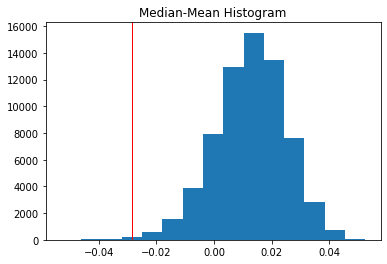

----------------------------------------------------------
n = 67599
Initial Variance: 0.00961223
Average Variance Score: 0.003685648817733983
Standard Deviation Variance Score: 0.0008537537566698308
z-score = 6.9417922158062995


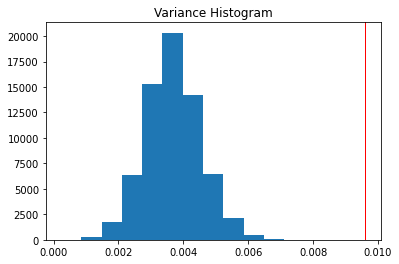

----------------------------------------------------------
n = 67599
Initial Effidiency Gap: 0.262385
Average Efficiency Gap Score: 0.18223039167589525
Standard Deviation Efficiency Gap Score: 0.09914421710995018
z-score = 0.8084647865564755


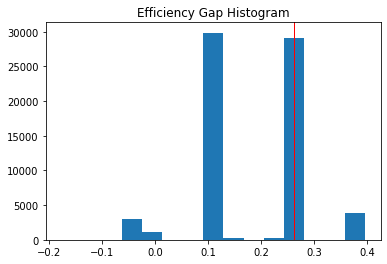

----------------------------------------------------------
n = 67599
Initial B_G Modified: 0.0244749
Average B_G Modified Score: 0.024752686198020513
Standard Deviation B_G Modified Score: 0.005372630900113043
z-score = -0.05170394229290291


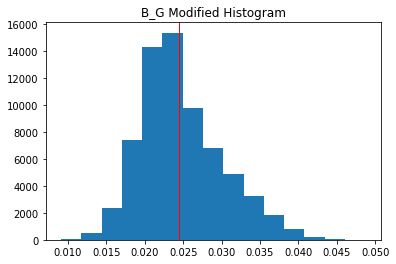

----------------------------------------------------------


In [68]:
## Calculate descriptive statistics for a sample of maps produced.

%matplotlib inline
import matplotlib.pyplot as plt

print("----------------- DESCRIPTIVE STATISTICS -----------------")

### MEDIAN MEAN ###
if test_median_mean == True:
    # MEAN
    sum_MM = 0
    sumsq_MM = 0
    MM_pts = list()
    for line in MC_Median_Mean:
        MM_pts.append(line[0])
        sum_MM += line[0]
        sumsq_MM += line[0]**2
    n = len(MC_Median_Mean)
    stat_MM_mean = sum_MM / n
    # STANDARD DEVIATION
    stat_MM_sdev = math.sqrt((sumsq_MM - (sum_MM**2)/n)/(n-1))
    # Z-SCORE
    z_MM = (MC_Median_Mean[0][0]-stat_MM_mean)/stat_MM_sdev
    
    print("n = " + str(n))
    print("Initial Median-Mean Score: " + str(MC_Median_Mean[0][0]))
    print("Average Median-Mean Score: " + str(stat_MM_mean))
    print("Standard Deviation Median-Mean Score: " + str(stat_MM_sdev))
    print("z-score = " + str(z_MM))
    
    plt.hist(MM_pts,bins=15)
    plt.title('Median-Mean Histogram')
    plt.axvline(MC_Median_Mean[0][0], color='r', linewidth=1)
    plt.show()

    print("----------------------------------------------------------")

### VARIANCE ###
# Q: Does it makes sense to look at the variance of the variance scores?
if test_variance == True:
    # MEAN
    sum_VAR = 0
    sumsq_VAR = 0
    VAR_pts = list()
    for line in MC_Variance:
        VAR_pts.append(line[0])
        sum_VAR += line[0]
        sumsq_VAR += line[0]**2
    n = len(MC_Variance)
    stat_VAR_mean = sum_VAR / n
    # STANDARD DEVIATION
    stat_VAR_sdev = math.sqrt((sumsq_VAR - (sum_VAR**2)/n)/(n-1))
    # Z-SCORE
    z_VAR = (MC_Variance[0][0]-stat_VAR_mean)/stat_VAR_sdev
    
    print("n = " + str(n))
    print("Initial Variance: " + str(MC_Variance[0][0]))
    print("Average Variance Score: " + str(stat_VAR_mean))
    print("Standard Deviation Variance Score: " + str(stat_VAR_sdev))
    print("z-score = " + str(z_VAR))
    
    plt.hist(VAR_pts,bins=15)
    plt.title('Variance Histogram')
    plt.axvline(MC_Variance[0][0], color='r', linewidth=1)
    plt.show()

    print("----------------------------------------------------------")

### EFFICIENCY GAP ###
if test_efficiency_gap == True:
    # MEAN
    sum_EG = 0
    sumsq_EG = 0
    EG_pts = list()
    for line in MC_Efficiency_Gap:
        EG_pts.append(line[0])
        sum_EG += line[0]
        sumsq_EG += line[0]**2
    n = len(MC_Efficiency_Gap)
    stat_EG_mean = sum_EG / n
    # STANDARD DEVIATION
    stat_EG_sdev = math.sqrt((sumsq_EG - (sum_EG**2)/n)/(n-1))
    # Z-SCORE
    z_EG = (MC_Efficiency_Gap[0][0]-stat_EG_mean)/stat_EG_sdev
    
    print("n = " + str(n))
    print("Initial Effidiency Gap: " + str(MC_Efficiency_Gap[0][0]))
    print("Average Efficiency Gap Score: " + str(stat_EG_mean))
    print("Standard Deviation Efficiency Gap Score: " + str(stat_EG_sdev))
    print("z-score = " + str(z_EG))
    
    plt.hist(EG_pts,bins=15)
    plt.title('Efficiency Gap Histogram')
    plt.axvline(MC_Efficiency_Gap[0][0], color='r', linewidth=1)
    plt.show()
    
    print("----------------------------------------------------------")

### PARTISAN BIAS ###
if test_partisan_bias == True:
    # MEAN
    sum_PB = 0
    sumsq_PB = 0
    PB_pts = list()
    for line in MC_Partisan_Bias:
        PB_pts.append(line[0])
        sum_PB += line[0]
        sumsq_PB += line[0]**2
    n = len(MC_Partisan_Bias)
    stat_PB_mean = sum_PB / n
    # STANDARD DEVIATION
    stat_PB_sdev = math.sqrt((sumsq_PB - (sum_PB**2)/n)/(n-1))
    # Z-SCORE
    z_PB = (MC_Partisan_Bias[0][0]-stat_PB_mean)/stat_PB_sdev

    print("n = " + str(n))
    print("Initial Partisan Bias: " + str(MC_Partisan_Bias[0][0]))
    print("Average Partisan Bias Score: " + str(stat_PB_mean))
    print("Standard Deviation Partisan Bias Score: " + str(stat_PB_sdev))
    print("z-score = " + str(z_PB))
    
    plt.hist(PB_pts,bins=15)
    plt.title('Partisan Bias Histogram')
    plt.axvline(MC_Partisan_Bias[0][0], color='r', linewidth=1)
    plt.show()

    print("----------------------------------------------------------")

### BG UNIFORM ###
if test_BG_uniform == True:
    # MEAN
    sum_BGU = 0
    sumsq_BGU = 0
    BGU_pts = list()
    for line in MC_BG_Uniform:
        BGU_pts.append(line[0])
        sum_BGU += line[0]
        sumsq_BGU += line[0]**2
    n = len(MC_BG_Uniform)
    stat_BGU_mean = sum_BGU / n
    # STANDARD DEVIATION
    stat_BGU_sdev = math.sqrt((sumsq_BGU - (sum_BGU**2)/n)/(n-1))
    # Z-SCORE
    z_BGU = (MC_BG_Uniform[0][0]-stat_BGU_mean)/stat_BGU_sdev
    
    print("n = " + str(n))
    print("Initial B_G Uniform: " + str(MC_BG_Uniform[0][0]))
    print("Average B_G Uniform Score: " + str(stat_BGU_mean))
    print("Standard Deviation B_G Uniform Score: " + str(stat_BGU_sdev))
    print("z-score = " + str(z_BGU))
    
    plt.hist(BGU_pts,bins=25)
    plt.title('B_G Uniform Histogram')
    plt.axvline(MC_BG_Uniform[0][0], color='r', linewidth=1)
    plt.show()

    print("----------------------------------------------------------")

### BG MODIFIED ###
if test_BG_modified == True:
    # MEAN
    sum_BGM = 0
    sumsq_BGM = 0
    BGM_pts = list()
    for line in MC_BG_Modified:
        BGM_pts.append(line[0])
        sum_BGM += line[0]
        sumsq_BGM += line[0]**2
    n = len(MC_BG_Modified)
    stat_BGM_mean = sum_BGM / n
    # STANDARD DEVIATION
    stat_BGM_sdev = math.sqrt((sumsq_BGM - (sum_BGM**2)/n)/(n-1))
    # Z-SCORE
    z_BGM = (MC_BG_Modified[0][0]-stat_BGM_mean)/stat_BGM_sdev

    print("n = " + str(n))
    print("Initial B_G Modified: " + str(MC_BG_Modified[0][0]))
    print("Average B_G Modified Score: " + str(stat_BGM_mean))
    print("Standard Deviation B_G Modified Score: " + str(stat_BGM_sdev))
    print("z-score = " + str(z_BGM))
    
    plt.hist(BGM_pts,bins=15)
    plt.title('B_G Modified Histogram')
    plt.axvline(MC_BG_Modified[0][0], color='r', linewidth=1)
    plt.show()
    
    print("----------------------------------------------------------")

How does the P-VALUE change with the number of steps?


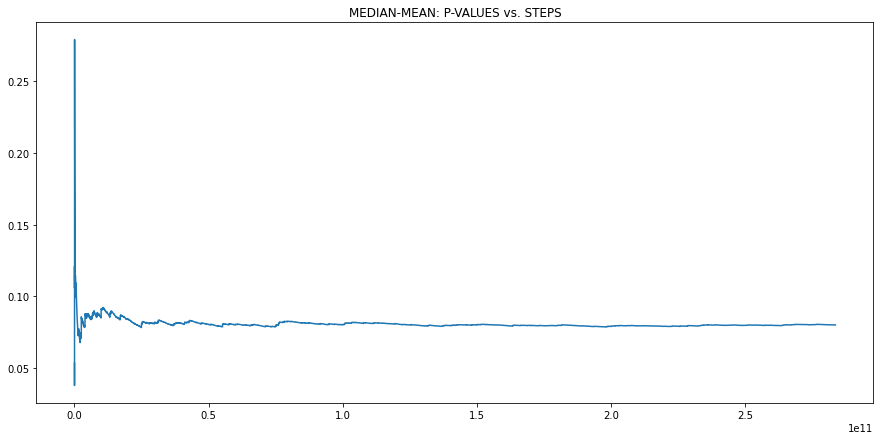

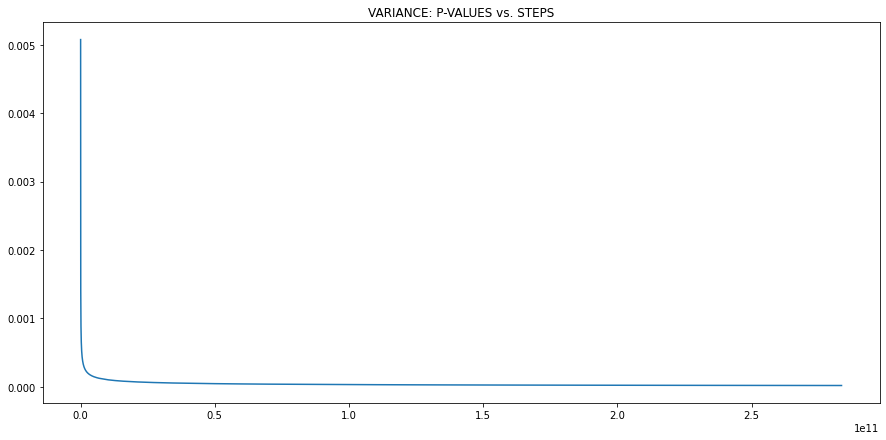

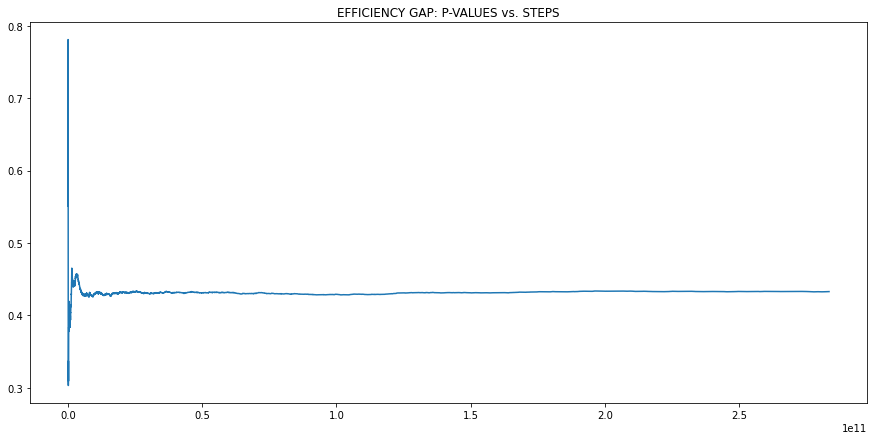

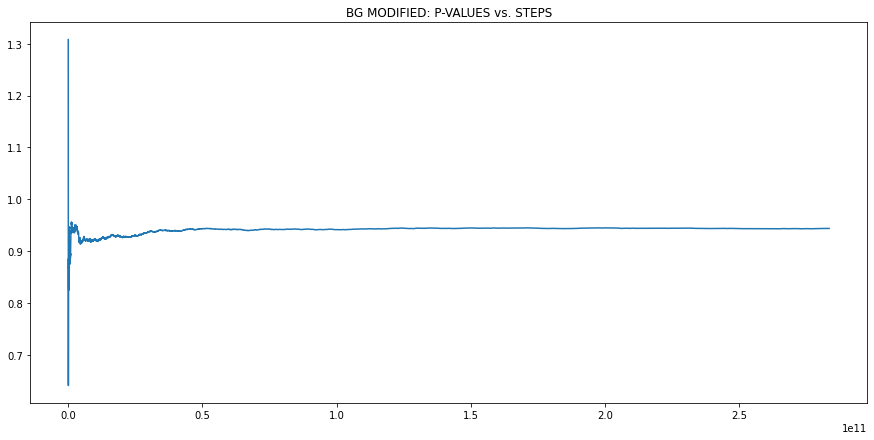

In [69]:
# DISPLAY APPROPRIATE GRAPHS

print("How does the P-VALUE change with the number of steps?")

if test_median_mean == True:
    x_steps_mm = list()
    y_pvals_mm = list()
    
    for line in MC_Median_Mean:
        # Number of Steps on the x-axis
        x_steps_mm.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_mm.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_mm[0]==0)
    x_steps_mm.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_mm[0]==None)
    y_pvals_mm.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_mm, y_pvals_mm)
    plt.title('MEDIAN-MEAN: P-VALUES vs. STEPS')
    plt.show()
    
if test_variance == True:
    x_steps_v = list()
    y_pvals_v = list()
    
    for line in MC_Variance:
        # Number of Steps on the x-axis
        x_steps_v.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_v.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_v[0]==0)
    x_steps_v.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_v[0]==None)
    y_pvals_v.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_v, y_pvals_v)
    plt.title('VARIANCE: P-VALUES vs. STEPS')
    plt.show()
    
if test_efficiency_gap == True:
    x_steps_eg = list()
    y_pvals_eg = list()
    
    for line in MC_Efficiency_Gap:
        # Number of Steps on the x-axis
        x_steps_eg.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_eg.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_eg[0]==0)
    x_steps_eg.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_eg[0]==None)
    y_pvals_eg.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_eg, y_pvals_eg)
    plt.title('EFFICIENCY GAP: P-VALUES vs. STEPS')
    plt.show()
    
if test_partisan_bias == True:
    x_steps_pb = list()
    y_pvals_pb = list()
    
    for line in MC_Partisan_Bias:
        # Number of Steps on the x-axis
        x_steps_pb.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_pb.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_pb[0]==0)
    x_steps_pb.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_pb[0]==None)
    y_pvals_pb.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_pb, y_pvals_pb)
    plt.title('PARTISAN BIAS: P-VALUES vs. STEPS')
    plt.show()
    
if test_BG_uniform == True:
    x_steps_bgu = list()
    y_pvals_bgu = list()
    
    for line in MC_BG_Uniform:
        # Number of Steps on the x-axis
        x_steps_bgu.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_bgu.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_bgu[0]==0)
    x_steps_bgu.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_bgu[0]==None)
    y_pvals_bgu.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_bgu, y_pvals_bgu)
    plt.title('BG UNIFORM: P-VALUES vs. STEPS')
    plt.show()
    
if test_BG_modified == True:
    x_steps_bgm = list()
    y_pvals_bgm = list()
    
    for line in MC_BG_Modified:
        # Number of Steps on the x-axis
        x_steps_bgm.append(line[3])
        
        # P-Value on the y-axis
        y_pvals_bgm.append(line[5])
    
    # Remove the first observation since it's before we take any steps.
    assert(x_steps_bgm[0]==0)
    x_steps_bgm.pop(0)
    # Remove the first observation since it's when the p-value == None
    assert(y_pvals_bgm[0]==None)
    y_pvals_bgm.pop(0)
    
    plt.figure(figsize=(15,7))
    plt.plot(x_steps_bgm, y_pvals_bgm)
    plt.title('BG MODIFIED: P-VALUES vs. STEPS')
    plt.show()

How does the MEASURE change with the number of steps?


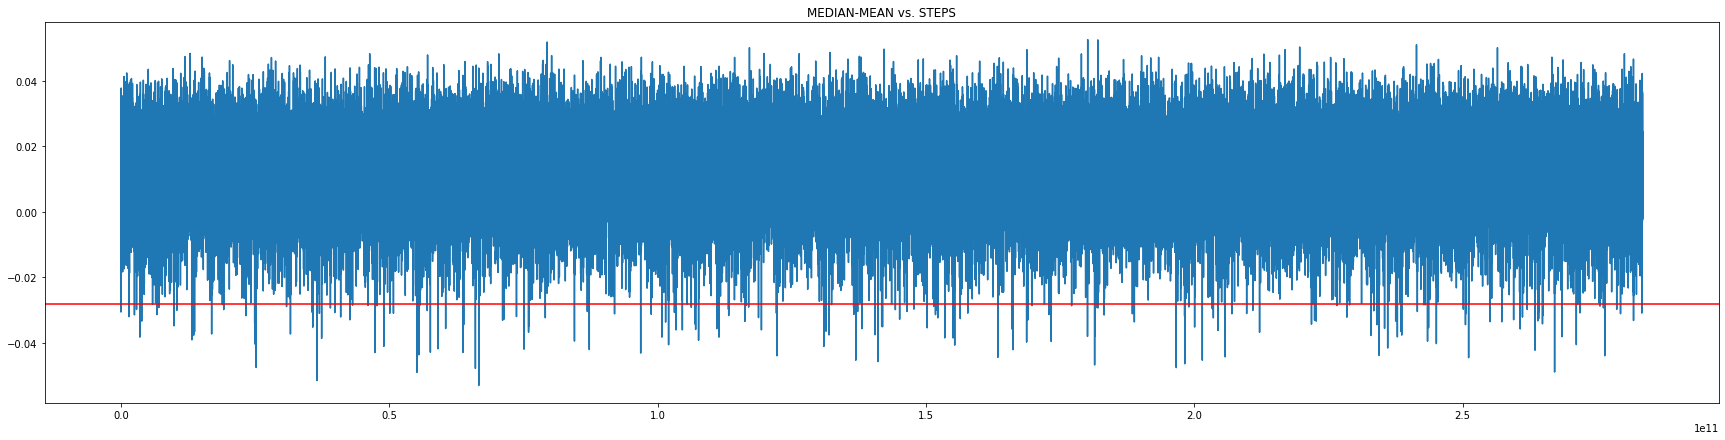

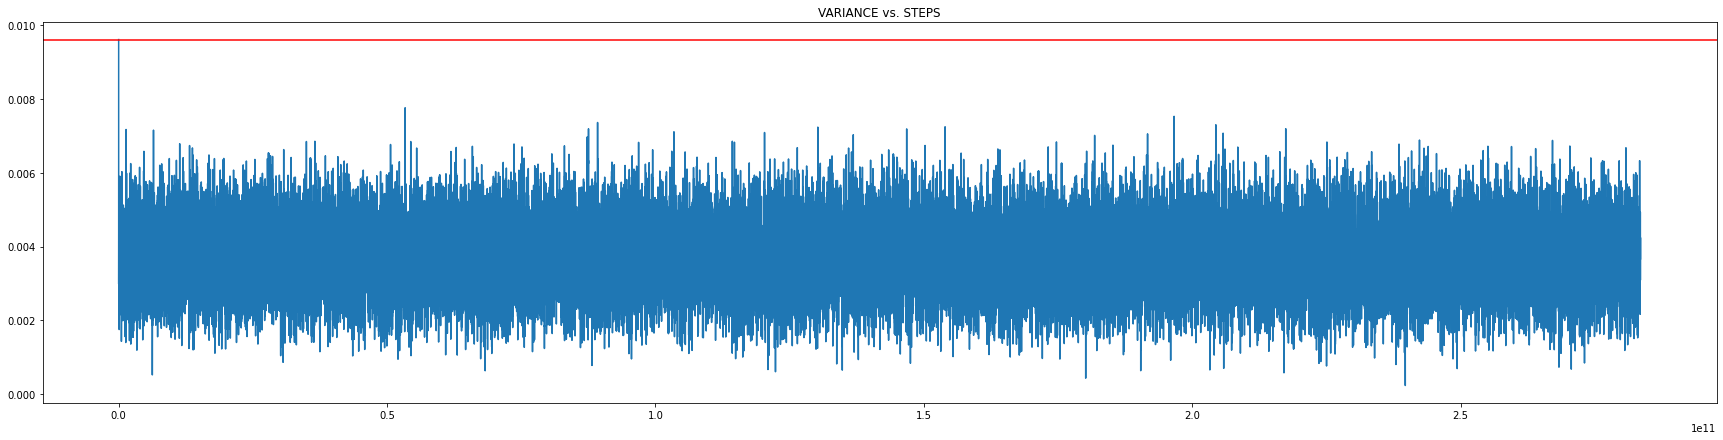

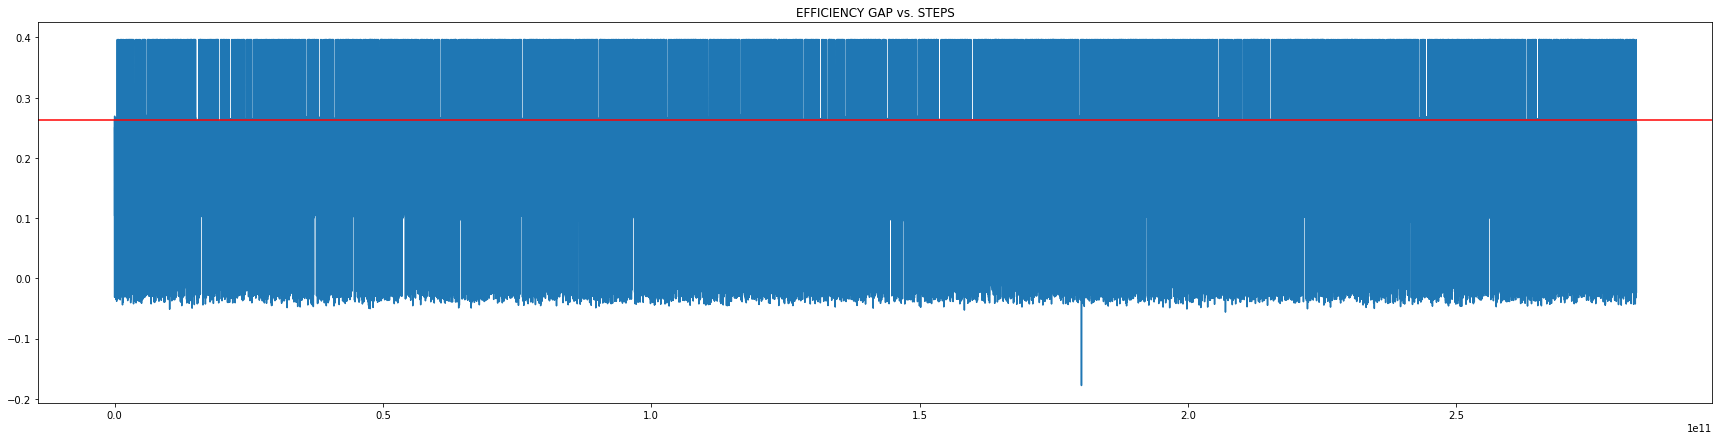

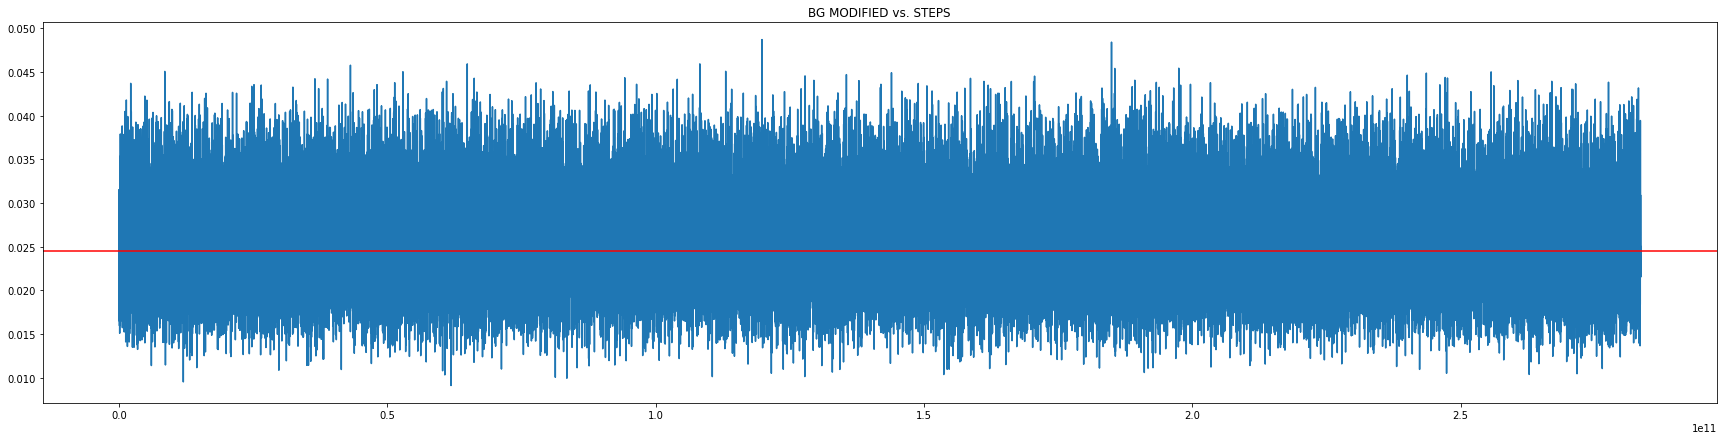

In [70]:
# DISPLAY APPROPRIATE GRAPHS

print("How does the MEASURE change with the number of steps?")

if test_median_mean == True:
    y_measure_mm = list()
    for line in MC_Median_Mean:
        # Measure on the y-axis
        y_measure_mm.append(line[0]) #keep initial observation
    if x_steps_mm[0]!=0:
        x_steps_mm.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_mm, y_measure_mm)
    plt.axhline(y=MC_Median_Mean[0][0],color='r')
    plt.title('MEDIAN-MEAN vs. STEPS')
    plt.show()
    
if test_variance == True:
    y_measure_v = list()
    for line in MC_Variance:
        y_measure_v.append(line[0])
    if x_steps_v[0]!=0:
        x_steps_v.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_v, y_measure_v)
    plt.axhline(y=MC_Variance[0][0],color='r')
    plt.title('VARIANCE vs. STEPS')
    plt.show()
    
if test_efficiency_gap == True:
    y_measure_eg = list()
    for line in MC_Efficiency_Gap:
        y_measure_eg.append(line[0])
    if x_steps_eg[0]!=0:
        x_steps_eg.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_eg, y_measure_eg)
    plt.axhline(y=MC_Efficiency_Gap[0][0],color='r')
    plt.title('EFFICIENCY GAP vs. STEPS')
    plt.show()
    
if test_partisan_bias == True:
    y_measure_pb = list()
    for line in MC_Partisan_Bias:
        y_measure_pb.append(line[0])
    if x_steps_pb[0]!=0:
        x_steps_pb.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_pb, y_measure_pb)
    plt.axhline(y=MC_Partisan_Bias[0][0],color='r')
    plt.title('PARTISAN BIAS vs. STEPS')
    plt.show()
    
if test_BG_uniform == True:
    y_measure_bgu = list()
    for line in MC_BG_Uniform:
        y_measure_bgu.append(line[0])
    if x_steps_bgu[0]!=0:
        x_steps_bgu.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_bgu, y_measure_bgu)
    plt.axhline(y=MC_BG_Uniform[0][0],color='r')
    plt.title('BG UNIFORM vs. STEPS')
    plt.show()
    
if test_BG_modified == True:
    y_measure_bgm = list()
    for line in MC_BG_Modified:
        y_measure_bgm.append(line[0])
    if x_steps_bgm[0]!=0:
        x_steps_bgm.insert(0,0)
    plt.figure(figsize=(30,7))
    plt.plot(x_steps_bgm, y_measure_bgm)
    plt.axhline(y=MC_BG_Modified[0][0],color='r')
    plt.title('BG MODIFIED vs. STEPS')
    plt.show()

In [71]:
## Write a script to parse each data frame into a CSV file (step, p-value, measure, etc) as above. 
## Repeat for each output file and generate separate CSV's.
## Then write a script that shows the interesting output.
## Write something to analyze the descriptive stats for each run.